# Project

---

#Import Libraries & Declare paths

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import warnings
  warnings.simplefilter("ignore")
except:
  print("No-drive")

# We install the Simple Transformers library to use Transformer models in a simple way
!pip install simpletransformers
import pandas as pd
import numpy as np
import csv
import os
import time
from pathlib import Path
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
import pickle
nltk.download('names')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import names
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import string
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AutoModel, AutoTokenizer
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


device(type='cuda', index=0)

In [ ]:
# For logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

path_model="drive/MyDrive/Progetti-ING/model/"
path_data="drive/MyDrive/Progetti-ING/data/"

enum_VerdictType={
            0: "Accepted",1:"Rejected",2:"Improcedibile",3:"Inammissibile",4:"Mixed",5:"NotComputed"
        }

enum_MixType={
            0:"Not_Mixed",
            1:"Mixed_Accepted_Rejected",
            2:"Mixed_Accepted_Improcedibile",
            3:"Mixed_Accepted_Inammissibile",
            4:"Mixed_Rejected_Improcedibile",
            5:"Mixed_Rejected_Inammisibile",
            6:"Mixed_Improcedibile_Inammissibile",
            7:"Mixed_Accepted_Rejected_Improcedibile",
            8:"Mixed_Accepted_Rejected_Inammissibile",
            9:"Mixed_Accepted_Improcedibile_Inammissibile",
            10:"Mixed_Rejected_Inammissibile_Improcedibile",
            11:"Mixed_Accepted_Rejected_Inammissibile_improcedibile"
        }
columns= ["Id","PQM","FactAndLaw","Tribunal","Topics","Verdict"]

---
# Data Extraction
---

In [ ]:
df_sentence = pd.read_csv(path_data+"dataset_bigger.csv",  sep=";;;;", encoding="utf-8")
print("La dimensione del dataset è la seguente: ",len(df_sentence))
df_sentence.head(2)

La dimensione del dataset è la seguente:  49375


,Id,PQM,FactAndLaw,Tribunal,Topics,Verdict
0,ga-tar_cz-2021-3-1,Il Tribunale Amministrativo Regionale per la C...,"-OMISSIS-, Luogotenente dell&rsquo;Arma dei Ca...",tar_cz,"""[{""""Topic"""":""""Procedimento amministrativo"""",""...","""{""""Verdict"""":0,""""Mix"""":0}"""
1,ga-tar_fi-2021-3-1,Il Tribunale Amministrativo Regionale per la T...,La ricorrente agisce per ottenere l&rsquo;acce...,tar_fi,"""[{""""Topic"""":""""Sospensione Concessione"""",""""Con...","""{""""Verdict"""":1,""""Mix"""":0}"""


---
# Data analysis
---

In [ ]:
df=df_sentence.copy()
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.reset_index(drop=True,inplace=True)
print("La dimensione del dataset è la seguente: ",len(df_without_duplicates))
df_without_duplicates.head(2)['FactAndLaw'][0]

La dimensione del dataset è la seguente:  47655


"-OMISSIS-, Luogotenente dell&rsquo;Arma dei Carabinieri, ha impugnato con richiesta di sospensione, la sanzione di stato della &ldquo;sospensione disciplinare dall&rsquo;impiego&rdquo; per mesi 8 comminata per avere il militare ricevuto avviso di garanzia per concorso in estorsione con metodo mafioso per omesso intervento in appurata vicenda estorsiva a danno di imprenditore. A sostegno del ricorso ha lamentato la violazione dell&rsquo;art. 1393, secondo e terzo capoverso, del C.O.M in quanto la fattispecie andrebbe sussunta nella residuata ipotesi di pregiudiziale penale, la violazione dei termini del procedimento disciplinare, l&rsquo;eccesso di potere per difetto di istruttoria e la violazione del principio di proporzionalit&agrave;. Ha, altres&igrave; domandato il risarcimento del danno di natura patrimoniale conseguente alla sanzione per la derivata riduzione dello stipendio, per le conseguenze sullo stato di servizio e pensionistico e di natura non patrimoniale per il danno all&

In [ ]:
df_without_duplicates=df_without_duplicates.dropna( subset=['FactAndLaw']).reset_index(drop=True)
print(df_without_duplicates.isna().sum())

Id            0
PQM           0
FactAndLaw    0
Tribunal      0
Topics        1
Verdict       0
dtype: int64


## Sentence labels creation
---

In [ ]:
import json
def convert_target(col):
  target_col=[]
  target_col_agg=[]
  target_col_num=[]
  target_col_agg_num=[]
  for el in col:

    if len(el)==27 or len(el)==28:
      # print(el[14])
      # print(el[24])
      if (int(el[14])==4):
        if(el[25]!='}'):
          target=enum_MixType[int(el[24:26])]
          tn=int(el[24:26])
        else:
          target=enum_MixType[int(el[24])]
          tn=int(el[24])
      else:
        target=enum_VerdictType[int(el[14])]
        tn=int(el[14])
      # print(target)
      target_col_agg.append(enum_VerdictType[int(el[14])])
      target_col.append(target)

      target_col_agg_num.append(int(el[14]))
      target_col_num.append(tn)
    else:
      target_col.append(None)
      target_col_agg.append(None)
      target_col_num.append(None)
      target_col_agg_num.append(None)
      print(el)
  return target_col,target_col_agg,target_col_num,target_col_agg_num

target_col,target_col_agg,target_col_num,target_col_agg_num=convert_target(df_without_duplicates["Verdict"])
df_without_duplicates["result"]=target_col
df_without_duplicates["result_agg"]=target_col_agg
df_without_duplicates["result_num"]=target_col_num
df_without_duplicates["result_agg_num"]=target_col_agg_num
df_without_duplicates

Verdict


,Id,PQM,FactAndLaw,Tribunal,Topics,Verdict,result,result_agg,result_num,result_agg_num
0,ga-tar_cz-2021-3-1,Il Tribunale Amministrativo Regionale per la C...,"-OMISSIS-, Luogotenente dell&rsquo;Arma dei Ca...",tar_cz,"""[{""""Topic"""":""""Procedimento amministrativo"""",""...","""{""""Verdict"""":0,""""Mix"""":0}""",Accepted,Accepted,0.0,0.0
1,ga-tar_fi-2021-3-1,Il Tribunale Amministrativo Regionale per la T...,La ricorrente agisce per ottenere l&rsquo;acce...,tar_fi,"""[{""""Topic"""":""""Sospensione Concessione"""",""""Con...","""{""""Verdict"""":1,""""Mix"""":0}""",Rejected,Rejected,1.0,1.0
2,ga-cgagiur-2021-3-11,Il Consiglio di Giustizia Amministrativa per l...,1 Il Comune di Acireale indiceva una gara per ...,cgagiur,"""[{""""Topic"""":""""Ambiente"""",""""Confidence"""":0.144...","""{""""Verdict"""":0,""""Mix"""":0}""",Accepted,Accepted,0.0,0.0
3,ga-tar_aq-2021-3-1,Il Tribunale Amministrativo Regionale per l'Ab...,"In data 12/4/2019, la societ&agrave; ricorrent...",tar_aq,"""[{""""Topic"""":""""Enti locali"""",""""Confidence"""":0....","""{""""Verdict"""":0,""""Mix"""":0}""",Accepted,Accepted,0.0,0.0
4,ga-tar_ge-2021-3-1,Il Tribunale Amministrativo Regionale per la L...,Con ricorso notificato il 7 maggio 2019 e depo...,tar_ge,"""[{""""Topic"""":""""Edilizia"""",""""Confidence"""":0.220...","""{""""Verdict"""":0,""""Mix"""":0}""",Accepted,Accepted,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
47650,ga-tar_na-2023-2849-1,Il Tribunale Amministrativo Regionale della Ca...,"1.Con ricorso notificato il 9-14.1.2020, Gigli...",tar_na,"""[{""""Topic"""":""""Edilizia"""",""""Confidence"""":0.179...","""{""""Verdict"""":4,""""Mix"""":6}""",Mixed_Improcedibile_Inammissibile,Mixed,6.0,4.0
47651,ga-tar_na-2023-2940-1,Il Tribunale Amministrativo Regionale per la C...,"Con l&rsquo;atto introduttivo del giudizio, il...",tar_na,"""[{""""Topic"""":""""Procedimento amministrativo"""",""...","""{""""Verdict"""":4,""""Mix"""":4}""",Mixed_Rejected_Improcedibile,Mixed,4.0,4.0
47652,ga-tar_mi-2023-1043-1,Il Tribunale Amministrativo Regionale per la L...,Con ricorso notificato in data 27 ottobre 2022...,tar_mi,"""[{""""Topic"""":""""Risarcimento del danno"""",""""Conf...","""{""""Verdict"""":4,""""Mix"""":4}""",Mixed_Rejected_Improcedibile,Mixed,4.0,4.0
47653,ga-tar_mi-2023-1104-1,Il Tribunale Amministrativo Regionale per la L...,"""1. Con bando pubblicato in Gazzetta Ufficiale...",tar_mi,"""[{""""Topic"""":""""Contratti pubblici"""",""""Confiden...","""{""""Verdict"""":4,""""Mix"""":3}""",Mixed_Accepted_Inammissibile,Mixed,3.0,4.0


In [ ]:
print("-----------\nbefore\n",df_without_duplicates.isna().sum())
df_without_duplicates=df_without_duplicates.dropna().reset_index(drop=True)
print("-----------\nafter\n",df_without_duplicates.isna().sum())

-----------
before
 Id                0
PQM               0
FactAndLaw        0
Tribunal          0
Topics            1
Verdict           0
result            1
result_agg        1
result_num        1
result_agg_num    1
dtype: int64
-----------
after
 Id                0
PQM               0
FactAndLaw        0
Tribunal          0
Topics            0
Verdict           0
result            0
result_agg        0
result_num        0
result_agg_num    0
dtype: int64


In [ ]:
print(df_without_duplicates["result"].unique(),"\n",len(df_without_duplicates["result"].unique()))
print(df_without_duplicates["result_agg"].unique(),"\n",len(df_without_duplicates["result_agg"].unique()))

['Accepted' 'Rejected' 'Mixed_Accepted_Improcedibile' 'Improcedibile'
 'Inammissibile' 'Mixed_Accepted_Rejected' 'Mixed_Rejected_Improcedibile'
 'Mixed_Rejected_Inammisibile'
 'Mixed_Rejected_Inammissibile_Improcedibile'
 'Mixed_Improcedibile_Inammissibile' 'Mixed_Accepted_Inammissibile'
 'Mixed_Accepted_Rejected_Improcedibile'
 'Mixed_Accepted_Rejected_Inammissibile'
 'Mixed_Accepted_Improcedibile_Inammissibile'
 'Mixed_Accepted_Rejected_Inammissibile_improcedibile'] 
 15
['Accepted' 'Rejected' 'Mixed' 'Improcedibile' 'Inammissibile'] 
 5


---
# Data_Visualization
---

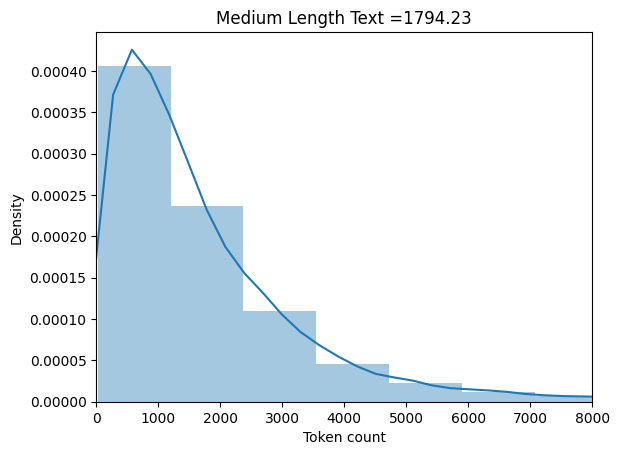

In [ ]:
def plot_token_occ(x,start,end, genere,title):
    token_lens = []
    for txt in x:
        txt_l=(str(txt)).split(' ')
        token_lens.append(len(txt_l))
    media=np.mean(token_lens)
    sns.distplot(token_lens)
    plt.xlim([start,end])
    plt.xlabel('Token count')
    plt.title(title+genere+" ="+ str(round(media,2)))
    plt.show()

df=df_without_duplicates
plot_token_occ(df['FactAndLaw'].tolist(),0,8000,'','Medium Length Text')

---
# Embeddings tecniques
---

---
## Data Preparation
---

In [ ]:
df["Text"]=df["FactAndLaw"]+"\n\n"+df["PQM"]+"\n\n"+df["Tribunal"]
df=df.drop(["Id","Topics","Verdict"],axis=1)
df=df.drop(["PQM","Tribunal"],axis=1)
df

,FactAndLaw,result,result_agg,result_num,result_agg_num,Text
0,"-OMISSIS-, Luogotenente dell&rsquo;Arma dei Ca...",Accepted,Accepted,0.0,0.0,"-OMISSIS-, Luogotenente dell&rsquo;Arma dei Ca..."
1,La ricorrente agisce per ottenere l&rsquo;acce...,Rejected,Rejected,1.0,1.0,La ricorrente agisce per ottenere l&rsquo;acce...
2,1 Il Comune di Acireale indiceva una gara per ...,Accepted,Accepted,0.0,0.0,1 Il Comune di Acireale indiceva una gara per ...
3,"In data 12/4/2019, la societ&agrave; ricorrent...",Accepted,Accepted,0.0,0.0,"In data 12/4/2019, la societ&agrave; ricorrent..."
4,Con ricorso notificato il 7 maggio 2019 e depo...,Accepted,Accepted,0.0,0.0,Con ricorso notificato il 7 maggio 2019 e depo...
...,...,...,...,...,...,...
47648,"1.Con ricorso notificato il 9-14.1.2020, Gigli...",Mixed_Improcedibile_Inammissibile,Mixed,6.0,4.0,"1.Con ricorso notificato il 9-14.1.2020, Gigli..."
47649,"Con l&rsquo;atto introduttivo del giudizio, il...",Mixed_Rejected_Improcedibile,Mixed,4.0,4.0,"Con l&rsquo;atto introduttivo del giudizio, il..."
47650,Con ricorso notificato in data 27 ottobre 2022...,Mixed_Rejected_Improcedibile,Mixed,4.0,4.0,Con ricorso notificato in data 27 ottobre 2022...
47651,"""1. Con bando pubblicato in Gazzetta Ufficiale...",Mixed_Accepted_Inammissibile,Mixed,3.0,4.0,"""1. Con bando pubblicato in Gazzetta Ufficiale..."


In [ ]:
clear_ds=df
y_label_code_agg=df["result_agg_num"]
y_label_code=df["result_agg"]

In [ ]:
labels_agg=True
if labels_agg:
  arr_label = np.array(y_label_code_agg)
else:
  arr_label = np.array(y_label_code)
arr_label

array([0., 1., 0., ..., 4., 4., 4.])

In [ ]:
def time_calculate(bool_t=True,start_time=0):
    if bool_t==True:
        print('START: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
        return time.time()
    else:
        end_time=time.time()
        print('END: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
        giorno_in_sec=86400
        giorni=(int(end_time)-int(start_time))//giorno_in_sec
        t = time.strftime("%Hh:%Mm:%Ss",time.gmtime(int(end_time)-int(start_time)))
        print("tempo impiegato "+str(giorni)+'d:'+t)
        return t

In [ ]:
class_names_list=list(enum_VerdictType.values())
if labels_agg!=True:
  class_names_list_mixed=list(enum_MixType.values())
  class_names_list=class_names_list+class_names_list_mixed
  class_names_list.remove("Mixed")
  print(class_names_list)

if ((df['result_agg']=='NotComputed').sum()==0):
  class_names_list.remove("NotComputed")
if ((df['result']=='Not_Mixed').sum()==0) and labels_agg==False:
  class_names_list.remove("Not_Mixed")

print(len(class_names_list))
class_names_list

5


['Accepted', 'Rejected', 'Improcedibile', 'Inammissibile', 'Mixed']

In [ ]:
def preprocessing(ds,print_val=2000,first=0,end=len(df)):
    New_Testo = []
    occ=0
    occ_print=print_val
    start_time = time.time()
    print('Analizzare i testi dalla riga:',first,', alla riga:',end)
    for ind in range (first,end):
        testo = str(ds[ind])
        #LOWER_CASE
        testo= testo.lower()
        #elimina citazione no perchè non ce ne sono

        # tokenization
        word_tokens = nltk.word_tokenize(testo);

        # Rimuovi punteggiatura
        word_tokens = list(filter(lambda token: token not in string.punctuation, word_tokens))

        # stopwords list
        stop_words = set(stopwords.words('italian'))

        # stoppping
        filtered_sentence = [w for w in word_tokens if not w in stop_words]

        document = ' '.join(filtered_sentence)
        # sostituisci risultato:
        New_Testo.append(document)
        end_time = time.time()
        t = time.strftime("%Hh:%Mm:%Ss",time.gmtime(int(end_time)-int(start_time)))
        if (occ%occ_print==0 and occ!=0) or (occ==(len(ds)-1)):
            print('analizzati',occ,'record',",tempo impiegato per trasformare",occ_print,"file: "+t,'size del vettore:',len(New_Testo)-1)
            start_time = time.time()
        occ+=1
    return New_Testo

def index_download(indice_path):
    ind=0
    if not Path(indice_path).exists():
        f= open(indice_path, "w")
        f.write(str(0))
        f.close()
    f=open(indice_path,"r")
    ind=int(f.read())
    f.close()
    return int(ind)

def carica_text(indice,path_d):
    if not Path(path_d).exists():
        print('Creato file di checkpoint per il nostro array dei testi processati')
        with open(path_d, 'w') as temp:
            primo=preprocessing(testi,10,indice,indice+1)
            pp=pd.DataFrame(primo, columns = ['text'])
            pp.to_csv(temp, index=False)
            indice+=1
    with open (path_d, 'r') as temp:
        processed_text = pd.read_csv(temp)
    return processed_text,indice

def salva_text(indice,testi, indice_path, path_d):
    with open(indice_path, 'w') as temp:
        temp.truncate(0)
        temp.write(str(indice))
        temp.close()

    with open(path_d, 'w') as temp:
        testi.to_csv(temp, index=False)
    return testi

def preprocessing_col(testi, indice_path,path_d):
    print('I record in totale sono:',len(testi))
    indice=index_download(indice_path)
    print("L'ultimo checkpoit è stato al record:",indice)

    text_loaded,indice=carica_text(indice,path_d)

    stampa_ogni=(len(clear_ds))//10
    end_ds=indice+(stampa_ogni*5)
    processed_text_final=text_loaded
    if indice==1:
        end_ds-=1
    if end_ds>len(testi):
        end_ds=len(testi)
    if indice!=len(testi):
        new_text_processed=pd.DataFrame( preprocessing(testi,stampa_ogni,indice,end_ds),columns = ['text'])
        processed_text=pd.DataFrame.append(text_loaded,new_text_processed)
        processed_text_final=salva_text(end_ds,processed_text,indice_path,path_d)

    return processed_text_final


testi=clear_ds['Text'].copy().tolist()
processed_text_final=preprocessing_col(testi,path_data+"index_scan_text_bert.txt",path_data+'outputfile_text_processed_bert.csv')

testi_sentence=clear_ds['FactAndLaw'].copy().tolist()
processed_sentence_final=preprocessing_col(testi_sentence,path_data+"index_scan_sentence_bert.txt",path_data+'outputfile_sentence_processed_bert.csv')

I record in totale sono: 47653
L'ultimo checkpoit è stato al record: 0
Creato file di checkpoint per il nostro array dei testi processati
Analizzare i testi dalla riga: 0 , alla riga: 1
Analizzare i testi dalla riga: 1 , alla riga: 23825
analizzati 4765 record ,tempo impiegato per trasformare 4765 file: 00h:01m:55s size del vettore: 4765
analizzati 9530 record ,tempo impiegato per trasformare 4765 file: 00h:01m:26s size del vettore: 9530
analizzati 14295 record ,tempo impiegato per trasformare 4765 file: 00h:01m:26s size del vettore: 14295
analizzati 19060 record ,tempo impiegato per trasformare 4765 file: 00h:01m:24s size del vettore: 19060
I record in totale sono: 47653
L'ultimo checkpoit è stato al record: 0
Creato file di checkpoint per il nostro array dei testi processati
Analizzare i testi dalla riga: 0 , alla riga: 1
Analizzare i testi dalla riga: 1 , alla riga: 23825
analizzati 4765 record ,tempo impiegato per trasformare 4765 file: 00h:01m:24s size del vettore: 4765
analizzati

In [ ]:
labels_agg=True
while (len(processed_text_final)==len(y_label_code_agg) and len(processed_text_final)==len(y_label_code) and len(processed_sentence_final)==len(y_label_code_agg) and len(processed_sentence_final)==len(y_label_code))==False:

testi=clear_ds['Text'].copy().tolist()
  processed_text_final=preprocessing_col(testi,path_data+"index_scan_text_bert.txt",path_data+'outputfile_text_processed_bert.csv')

  testi_sentence=clear_ds['FactAndLaw'].copy().tolist()
  processed_sentence_final=preprocessing_col(testi_sentence,path_data+"index_scan_sentence_bert.txt",path_data+'outputfile_sentence_processed_bert.csv')
  print((len(processed_text_final)==len(y_label_code_agg) and len(processed_text_final)==len(y_label_code) and len(processed_sentence_final)==len(y_label_code_agg) and len(processed_sentence_final)==len(y_label_code)))
(len(processed_text_final)==len(y_label_code_agg) and len(processed_text_final)==len(y_label_code) and len(processed_sentence_final)==len(y_label_code_agg) and len(processed_sentence_final)==len(y_label_code))

In [ ]:
Data_Set=clear_ds
y_code=None
if labels_agg==True:
  y_code=Data_Set["result_agg_num"]
else:
  y_code=Data_Set["result_num"]

In [ ]:
Data_Set['Text']=testi
Data_Set['FactAndLaw']=testi_sentence

In [ ]:
# prima splitta in train test
X = Data_Set[['Text','FactAndLaw']]
y = list(y_code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_train=X_train['FactAndLaw'].tolist()
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42,stratify=y_test)
X_validation=X_validation['FactAndLaw'].tolist()
X_test=X_test['FactAndLaw'].tolist()
print('Size iniziale dei record:',len(list(Data_Set['FactAndLaw'])),'\nSize train ds:',len(X_train),', Size train label:', len(y_train),'\nSize validation ds:',len(X_validation),', Size validation label:',len(y_validation),'\nSize test ds:',len(X_test),'Size test label:', len(y_test))

Size iniziale dei record: 47653 
Size train ds: 33357 , Size train label: 33357 
Size validation ds: 9578 , Size validation label: 9578 
Size test ds: 4718 Size test label: 4718


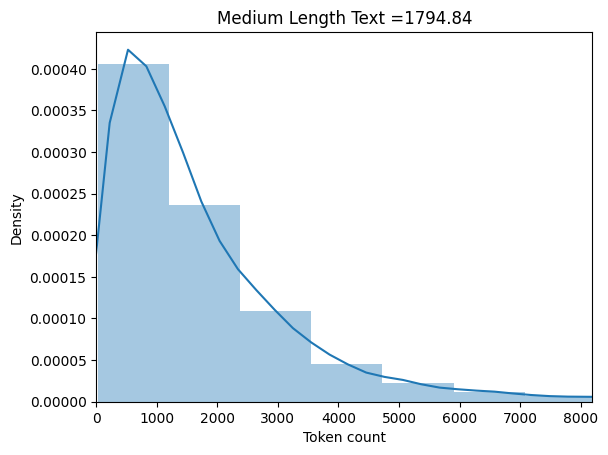

In [ ]:
token_lens_occ=plot_token_occ(X_train,0,8192,'','Medium Length Text')

In [ ]:
model_name = "dlicari/Italian-Legal-BERT"
# model_name = "bert-base-uncased"
max_length = 2048
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
def load_model(model_path, model,device='cpu'):
    if model_path==None:
        return
    print('MODEL ALREADY TRAINED')

    with open(model_path, 'rb') as pickle_file:
        if device=='cpu':
            model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
        else:
            model.load_state_dict(torch.load(model_path))
    return model

def save_model(model,model_path):
    with open(model_path, 'wb') as pickle_file:
        torch.save(model.state_dict(), model_path)
    print('SAVED')

def verifica_esistenza_modello(file_name):
    esiste=False
    try:
        my_file = Path(file_name)
        if my_file.is_file():
            esiste=True
    except IOError:
        print("File not accessible")
    print("Il file  esiste?",esiste)
    return esiste

def load_check(_path):
    with open(_path, 'rb') as pickle_file:
        file_upload = pickle.load(pickle_file)
    return file_upload

def load_evaluetion(output_path,target_path):
    output=load_check(output_path)
    target=load_check(target_path)
    return output,target

def save_evaluetion(output,targets,output_path,target_path):
    with open(output_path, 'wb') as pickle_file:
        pickle.dump(output, pickle_file)
    print('SAVED')
    with open(target_path, 'wb') as pickle_file:
        pickle.dump(targets, pickle_file)
    print('SAVED')

def set_checkpoint(path_,check):
    with open(path_, 'w') as file:
        file.truncate(0)
        file.write(str(check))

def load_checkpoint(path_):
    with open(path_, 'r') as file:
        load_check=int(file.readline())
    return load_check

path_name=path_model+'/BERT'
if labels_agg==True:
    model_path = path_name+"/italian_legal_bert_agg_classifier.pth"
    check_path = path_name+'/legal_checkpoint_agg.txt'

else:
    model_path = path_name+'/italian_legal_bert_model_nlp.pt'
    check_path = path_name+'/legal_checkpoint.txt'
verifica=verifica_esistenza_modello(model_path)

Il file  esiste? False


# Create a custom dataset class for text classification


In [ ]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label)}

class LEGALBERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(LEGALBERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

# Build our customer Italian Legal BERT classifier


In [ ]:
# Define the train() function
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    start_time=time_calculate()
    i=0
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].type(torch.LongTensor).to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()

        if i%100==0 and i!=0:
          print(f'Epoch: {epoch+1}, Loss:  {loss.item()}')
          end_time=time_calculate(bool_t=False,start_time=start_time)
          print('-'*50)
          start_time=time_calculate()

        i+=1

        optimizer.step()
        scheduler.step()


# Build our evaluation method
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)


# Build our prediction method
def predict(text, model, tokenizer, device, max_length=512):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
    return class_names_list[preds.item()]

# Set up parameters
bert_model_name = model_name
num_classes = len(class_names_list)
max_length = 512
batch_size = 8
num_epochs = 8
learning_rate = 2e-5

In [ ]:
class_names_list

['Accepted', 'Rejected', 'Improcedibile', 'Inammissibile', 'Mixed']

# Initialize tokenizer, dataset, and data loader


In [ ]:
train_params = {'batch_size': batch_size ,
                'shuffle': True,
                'num_workers': 8
                }

test_params = {'batch_size': batch_size,
                'shuffle': True,
                'num_workers': 8
                }

tokenizer = AutoTokenizer.from_pretrained(model_name)#BertTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(X_train, y_train, tokenizer, max_length)
val_dataset = TextClassificationDataset(X_validation, y_validation, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, **train_params)
val_dataloader = DataLoader(val_dataset, **test_params)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LEGALBERTClassifier(bert_model_name, num_classes).to(device)

optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

model

LEGALBERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

# Training the model


In [ ]:
if verifica==False:

    for epoch in range(num_epochs):
      start_time=time_calculate()
      print(f"Epoch {epoch + 1}/{num_epochs}")
      train(model, train_dataloader, optimizer, scheduler, device)
      accuracy, report = evaluate(model, val_dataloader, device)
      print(f"Validation Accuracy: {accuracy:.4f}")
      print(report)
      save_model(model,model_path)
      end_time=time_calculate(bool_t=False,start_time=start_time)
      set_checkpoint(check_path,epoch)
else:
    start_time=time_calculate()
    model=load_model(model_path, model)
    epoca=load_checkpoint(check_path)
    if (epoca+1)!=num_epochs:
      for epoch in range(epoca+1,num_epochs):
          start_time=time_calculate()
          print(f"Epoch {epoch + 1}/{num_epochs}")
          train(model, train_dataloader, optimizer, scheduler, device)
          accuracy, report = evaluate(model, val_dataloader, device)
          print(f"Validation Accuracy: {accuracy:.4f}")
          print(report)
          save_model(model,model_path)
          end_time=time_calculate(bool_t=False,start_time=start_time)
          set_checkpoint(check_path,epoch)
    end_time=time_calculate(bool_t=False,start_time=start_time)

# Evaluating our model’s performance


In [ ]:
# Test value prediction
test_text = X_test[0]
val_test=y_test[0]
prediction = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted value: {prediction}")
print(f"Real value: {class_names_list[int(val_test)]}")

"1.- Il Sindaco del Comune di Napoli, con ordinanza contingibile ed urgente n. 37 del 30 aprile 2016, accertato l&rsquo;impedimento alla viabilit&agrave; urbana causata dalla chiusura al traffico pedonale e veicolare del tratto di strada di Cupa Vecchia Napoli dal civico 2 al civico 4, resasi necessaria in ragione dei fenomeni franosi verificatisi lungo le scarpate laterali di detto tratto stradale nonch&eacute; del dissesto di un muro di contenimento, ha ordinato all&rsquo;odierna ricorrente di &ldquo;rimuovere ad horas una sbarra metallica al fine di permettere l'apertura al traffico veicolare e pedonale del tratto di strada dal civico 4 all'intersezione con via Comunale del Principe/Via Toscanella sino alla presentazione del certificato di eliminato pericolo relativi ai dissesti riscontrati dal civico 2 al civico 4"". Avverso la predetta ordinanza &egrave; insorta l&rsquo;odierna ricorrente affidando il gravame a quattro censure cos&igrave; rubricate: a) nullit&agrave; dell&rsquo;or